# PCA

![pca2d](PCA_2d.svg)
![pca](pca.png)

## Customer Satisfaction Analysis

A survey in order to evaluate 20 different healthcare structures. 200 customers have evaluated, with a 1-10 scale, each of six features of the service:

1. Courtesy
2. Clarity
3. Competence
4. Condition (of the structure)
5. Promptness (of the service)
6. Opening times

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
df2 = pd.read_csv("csat.csv")
print(df2)

df2.describe()


    Courtesy  Clarity  Competence  Condition  Promptness  Opening_times
0          7        5           9          8           6              7
1          5        6           8          4           4              6
2          5        5           8          7           7              7
3          6        6           9          7           6              7
4          7        5          10          4           3              6
5          6        4           8          4           5              6
6          5        6           9          4           3              5
7          5        5           8          5           4              6
8          4        4           7          7           5              6
9          5        5           8          7           6              7
10         5        5           5          6           5              7
11         4        3           6          7           6              7
12         5        4           8          8           6        

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.800000,4.600000,7.600000,6.150000,5.000000,6.300000
std,1.105013,0.994723,1.535544,1.814416,1.169795,0.732695
min,3.000000,3.000000,5.000000,3.000000,3.000000,5.000000
25%,4.000000,4.000000,6.750000,4.750000,4.000000,6.000000
50%,5.000000,5.000000,8.000000,6.500000,5.000000,6.000000
75%,5.000000,5.000000,8.250000,7.250000,6.000000,7.000000
max,7.000000,6.000000,10.000000,9.000000,7.000000,7.000000


<AxesSubplot: >

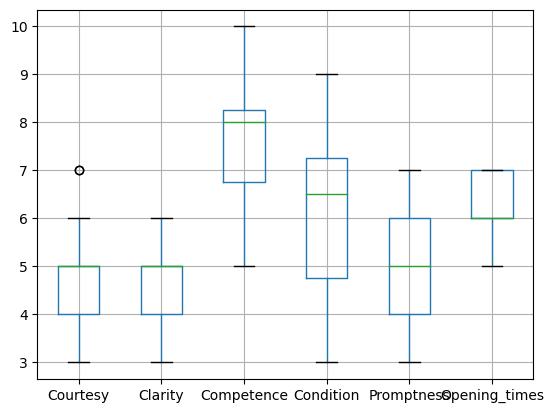

In [3]:
%matplotlib inline
df2.boxplot()


<AxesSubplot:>

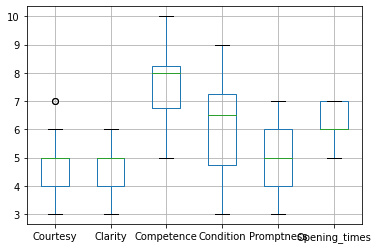

In [5]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(copy=False) 
scaler2.fit(df2.astype(float)) # 
scaler2.transform(df2.astype(float))
df2.boxplot()

In [6]:
df2_scaled=pd.DataFrame(scaler2.transform(df2.astype(float))) 
df2_scaled.columns=df2.columns
df2_scaled.head()

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
0,2.042649,0.412568,0.935414,1.046100,0.877058,0.980196
1,0.185695,1.443990,0.267261,-1.215737,-0.877058,-0.420084
2,0.185695,0.412568,0.267261,0.480640,1.754116,0.980196
3,1.114172,1.443990,0.935414,0.480640,0.877058,0.980196
4,2.042649,0.412568,1.603567,-1.215737,-1.754116,-0.420084


<AxesSubplot:>

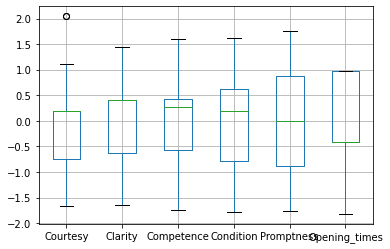

In [7]:
df2_scaled.boxplot()

In [8]:
df2.apply(lambda s: df2.corrwith(s))

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
Courtesy,1.000000,0.545861,0.694808,-0.115503,0.000000,0.143014
Clarity,0.545861,1.000000,0.544426,-0.081652,0.045231,0.101100
Competence,0.694808,0.544426,1.000000,0.003778,-0.058601,-0.121628
Condition,-0.115503,-0.081652,0.003778,1.000000,0.719114,0.439450
Promptness,0.000000,0.045231,-0.058601,0.719114,1.000000,0.798282
Opening_times,0.143014,0.101100,-0.121628,0.439450,0.798282,1.000000


In [9]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca2 = PCA()
pca2.fit(df2_scaled) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA()

In [10]:
#let's use the pca to transform the dataset
df2_pca = pd.DataFrame(pca2.transform(df2_scaled))
df2_pca

,0,1,2,3,4,5
0,-1.213592,-2.284217,0.227626,0.943510,0.639256,0.028990
1,1.595084,-0.785365,-0.803792,-0.889361,-0.095906,-0.086024
2,-1.768841,-0.908673,-0.239397,-0.098422,-0.453160,0.563923
3,-0.930384,-2.266028,-0.278082,-0.290028,0.018155,-0.015550
4,2.474352,-1.951528,-0.139969,1.153190,0.197307,-0.571159
5,0.983820,-0.337580,-0.430245,1.220114,-0.102566,0.764267
6,3.007233,-0.806971,0.268340,-1.046038,-0.017288,-0.045829
7,1.211056,-0.258626,-0.183017,-0.155048,0.018583,-0.230788
8,-0.224336,1.040537,0.592068,-0.125843,0.048535,0.033514
9,-1.227878,-0.789717,-0.222861,-0.077645,-0.212176,-0.071421


In [11]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca2.explained_variance_).transpose()

,0,1,2,3,4,5
0,2.450138,2.313038,0.712002,0.507948,0.216216,0.116447


In [12]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5
0,0.387939,0.366231,0.112734,0.080425,0.034234,0.018437


In [13]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca2.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5
0,0.387939,0.75417,0.866903,0.947328,0.981563,1.0


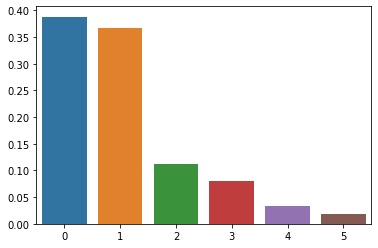

In [14]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [14]:
pd.DataFrame(pca2.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=df2.columns)


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
PC1,0.108588,0.082955,0.166297,-0.527831,-0.616793,-0.542802
PC2,-0.586905,-0.538902,-0.562070,-0.051455,-0.135631,-0.167814
PC3,-0.123933,-0.244882,0.467594,0.651152,-0.018854,-0.530731
PC4,0.537682,-0.790670,0.155511,-0.143601,-0.023690,0.200931
PC5,0.545638,0.131997,-0.617261,0.443239,-0.274763,-0.178578
PC6,0.203886,-0.012432,-0.180513,-0.278686,0.724403,-0.568564


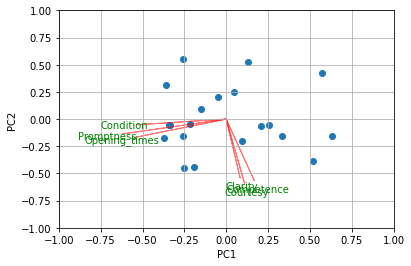

In [15]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca2.transform(df2_scaled)[:,0:2],np.transpose(pca2.components_[0:2, :]), df2.columns)
plt.show()

### 1st component:

The variables

   - Condition
   - Promptness
   - Opening-times

show a high correlation with the first component. This component can be summarized as an index of the **structure’s performances**

### 2nd component:

The variables
   - Courtesy
   - Clarity
   - Competence

show a high correlation with the second component. 
This component can be summarized as an index of the **personnel’s performance**

**Notice that the Principal Components have negative values in the variables that they explain.**

In [16]:
df2_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6']
df2_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.213592,-2.284217,0.227626,0.943510,0.639256,0.028990
1,1.595084,-0.785365,-0.803792,-0.889361,-0.095906,-0.086024
2,-1.768841,-0.908673,-0.239397,-0.098422,-0.453160,0.563923
3,-0.930384,-2.266028,-0.278082,-0.290028,0.018155,-0.015550
4,2.474352,-1.951528,-0.139969,1.153190,0.197307,-0.571159
5,0.983820,-0.337580,-0.430245,1.220114,-0.102566,0.764267
6,3.007233,-0.806971,0.268340,-1.046038,-0.017288,-0.045829
7,1.211056,-0.258626,-0.183017,-0.155048,0.018583,-0.230788
8,-0.224336,1.040537,0.592068,-0.125843,0.048535,0.033514
9,-1.227878,-0.789717,-0.222861,-0.077645,-0.212176,-0.071421


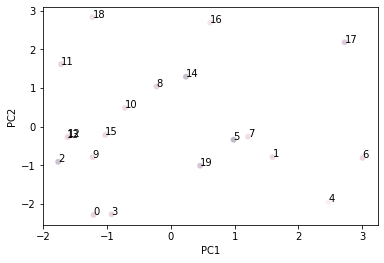

In [17]:
p1=sns.scatterplot(x="PC1", y="PC2",
              alpha=.3, 
              hue="PC6", legend=False,
              data=df2_pca);

# add annotations one by one with a loop
for line in range(0,df2_pca.shape[0]):
     p1.text(df2_pca.PC1[line], df2_pca.PC2[line], line, horizontalalignment='left', size='medium', color='black')


We conclude that 
 - centers 18,11 has a GOOD infrastructure but a BAD service
 - the group near 1,4,6 has BAD infrastructure but GOOD service quality 
 - the group 0,3,2,9 has GOOD infrastructure and service
 - center 17 has BAD infrastructure and service!

## Breast cancer wisconsin (diagnostic) dataset

In [7]:
dataset_df['target']=dataset.target

dataset_df.to_csv('/home/mausoto/Documents/Cursos/202303_health_informatics/datasets/breast_cancer_wisconsin.csv')

In [2]:
import pandas as pd
#upload a toy datasets from scikit-learn
#sklearn comes with a few small standard datasets that do not require to download any file from some external website
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer() #The breast cancer dataset is a classic and very easy binary classification dataset.

#create the dataframe
dataset_df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
dataset_df.columns = columns

print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [20]:
dataset_df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


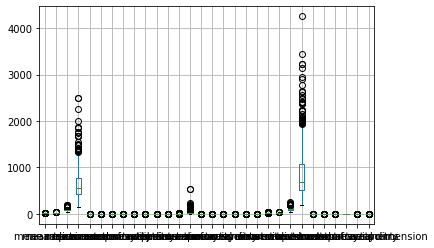

In [21]:
#dataset visualization tools
%matplotlib inline
dataset_df.boxplot()
dataset_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


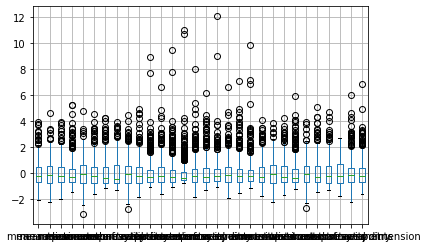

In [22]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler.fit(dataset_df) 
scaler.transform(dataset_df) 
dataset_df.boxplot()
dataset_df.head()

In [23]:
dataset_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

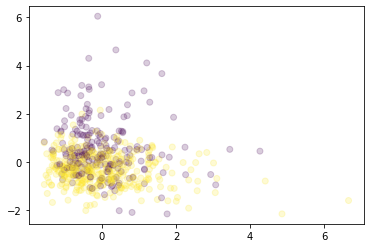

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = dataset_df.loc[:,'texture error']
y = dataset_df.loc[:,'worst symmetry']


plt.scatter(x, y,alpha=0.2,c=dataset.target )
plt.show()

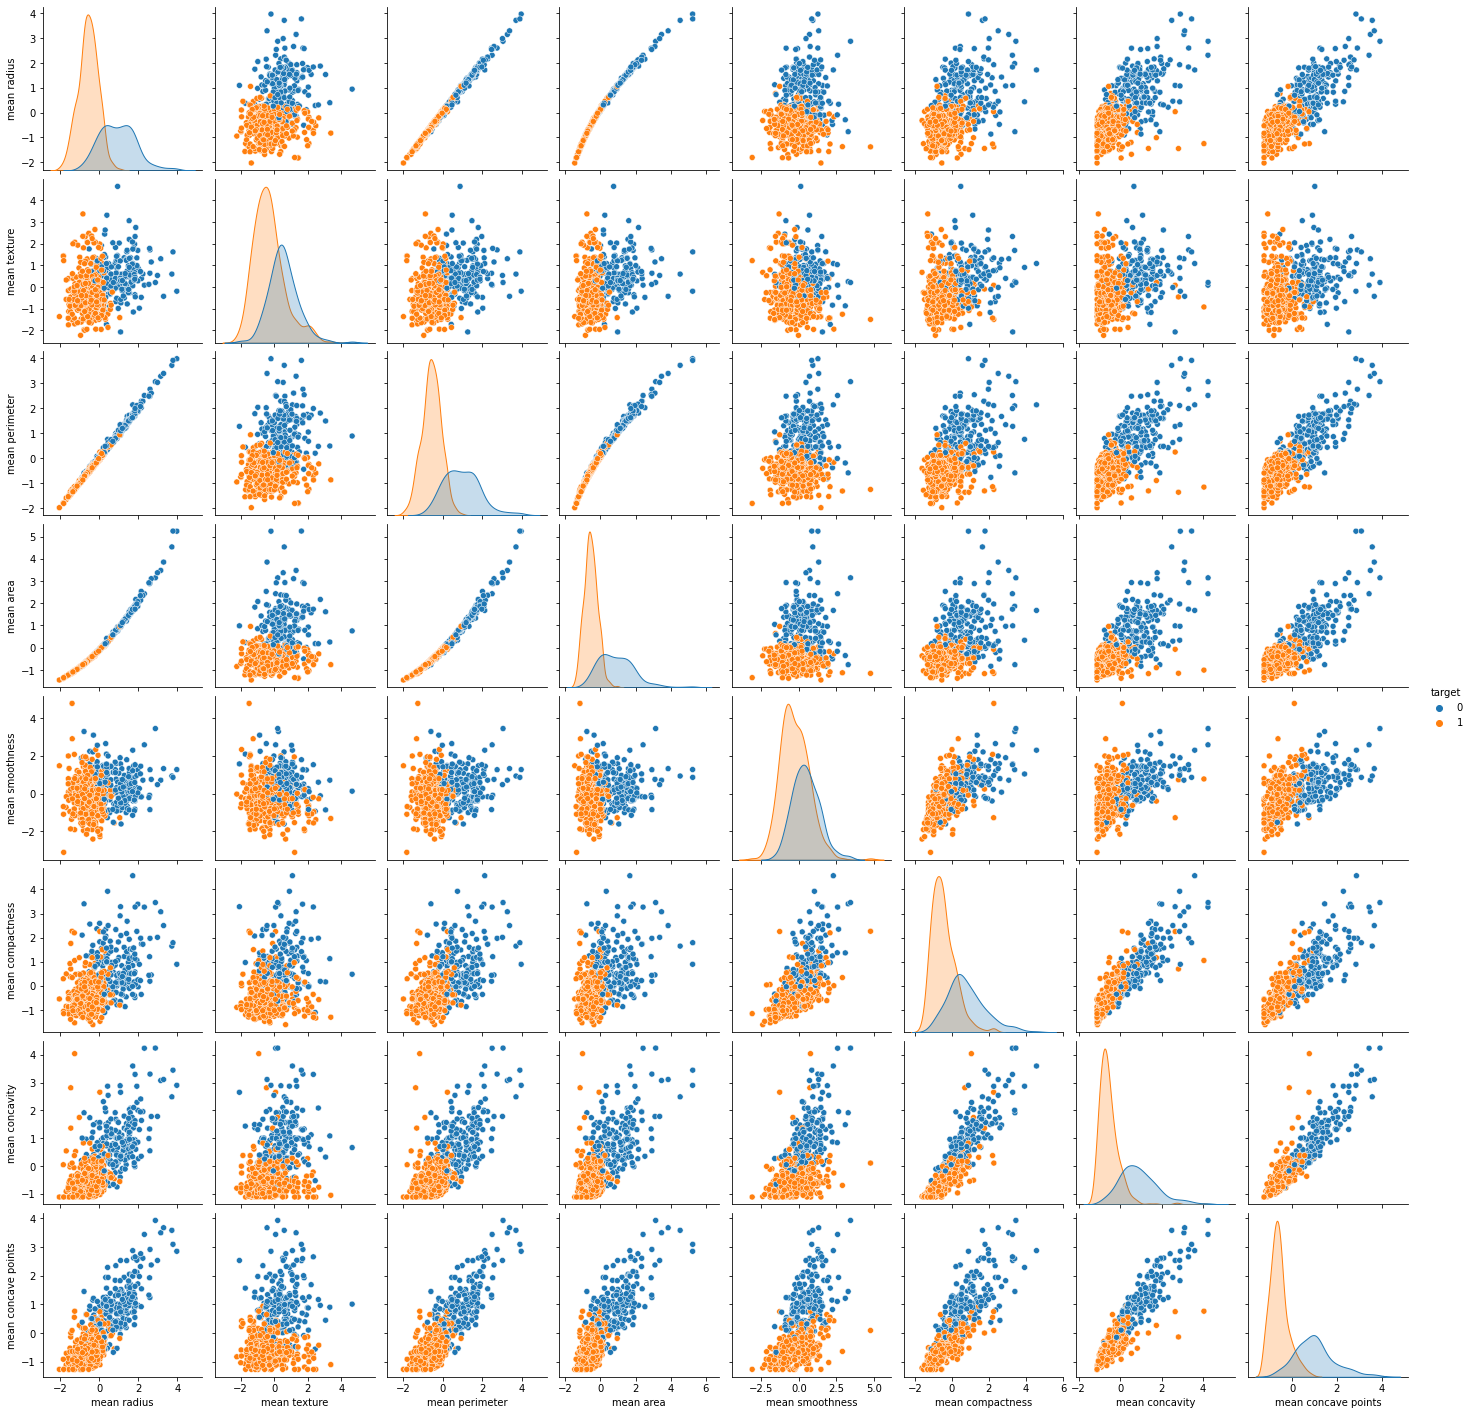

In [25]:
%matplotlib inline
import seaborn as sns

df_sample = dataset_df.copy()
df_sample = df_sample.iloc[:,:8]
df_sample['target']=dataset.target
sns.pairplot(df_sample, hue='target')

In [26]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA(n_components=10)
pca.fit(dataset_df) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA(n_components=10)

In [27]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 30)
Dataset shape after PCA:  (569, 10)


In [28]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9
0,13.304991,5.701375,2.82291,1.984128,1.651633,1.209482,0.676409,0.477456,0.417629,0.351311


In [29]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9
0,0.44272,0.189712,0.093932,0.066021,0.054958,0.040245,0.022507,0.015887,0.013896,0.01169


<AxesSubplot:>

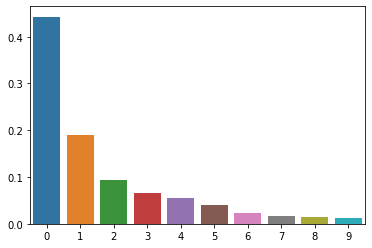

In [30]:
%matplotlib inline
import seaborn as sns
sns.barplot( data=explained_var)

In [31]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5,6,7,8,9
0,0.44272,0.632432,0.726364,0.792385,0.847343,0.887588,0.910095,0.925983,0.939879,0.951569


In [32]:
#PRINT the total percentage of explained variance 
print(cum_explained_var[-1]) 

0.9515688143309047


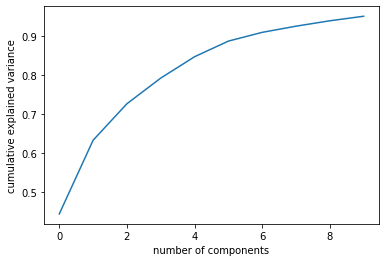

In [33]:
#CHOOSING THE NUMBER OF COMPONENTS - we can plot the cumulative percentage of explained variance
import matplotlib.pyplot as plt
plt.plot(cum_explained_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This previous curve quantifies how much of the total, 30-dimensional variance is contained within the first 10 components. 
For example, we see that the first 4 components contain approximately 79% of the variance, 
while you need around 6 components to describe close to 95% of the variance.

In [36]:
pd.DataFrame(pca.components_,index=['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'],columns=dataset_df.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
pc1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
pc2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
pc3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
pc4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
pc5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
pc6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
pc7,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
pc8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072828,-0.152322,-0.231531,-0.177122,...,0.042620,0.036252,0.030558,0.079394,0.205852,0.084020,0.072467,-0.036170,0.228225,0.048361
pc9,-0.223110,0.112700,-0.223739,-0.195586,0.006425,-0.167842,0.040591,-0.111971,0.256040,-0.123741,...,-0.112142,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
pc10,0.095487,0.240935,0.086386,0.074956,-0.069293,0.012936,-0.135604,0.008055,0.572069,0.081103,...,0.077362,0.029550,0.050508,0.069920,-0.128305,-0.172133,-0.311641,-0.076646,-0.029563,0.012610


In [37]:
# Let see the coordinates of the data in the PCA 
principalDf = pd.DataFrame(data = x_pca
             , columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877403
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106996
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454276
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405440,-1.116973
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [38]:
principalDf['target']=dataset.target
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

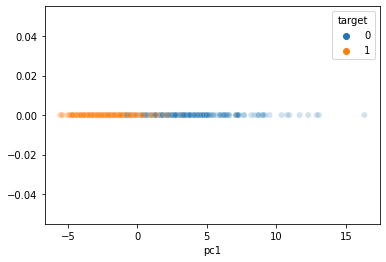

In [39]:
# The data in the first PCA 
sns.scatterplot(x="pc1",y=[0]*(principalDf['target'].size),
              hue="target", alpha=.2,
              data =principalDf);

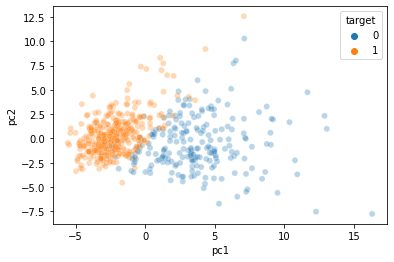

In [40]:
# The data in the first two PCA 
sns.scatterplot(x="pc1", y="pc2",
              hue="target", alpha=.3,
              data=principalDf);

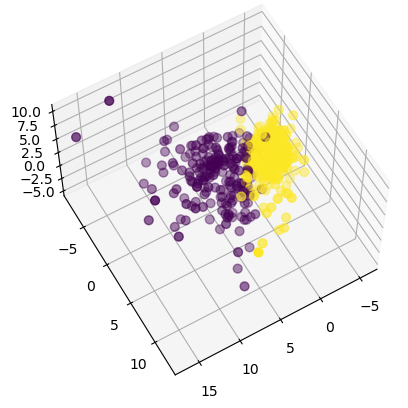

In [39]:
# The data in the first three PCA 

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['pc1'], principalDf['pc2'],principalDf['pc3'], c=principalDf['target'], s=40)
ax.view_init(60, 60)
plt.show()

In [40]:
#A PART FROM EXPLICITLY CHOOSE THE NUMBER OF PRINCIPAL COMPONENTS, YOU CAN RESORT TO SOME AUTOMATIC TOOLS SUCH AS:

#(1) You can leave the pca implementation of sklearn to choose the number of components by using:
    #Set n_components == 'mle' and svd_solver == 'full' and Minka’s MLE is used to guess the dimension. 
    
pca = PCA(n_components='mle',svd_solver='full') 
pca.fit(dataset_df)
pca.n_components_ 
#and then transform the dataset as we have already seen above

29

In [41]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 30)
Dataset shape after PCA:  (569, 29)


In [42]:
#OR (2) you can ask for the components able to explain a certain percentage of variance by using:
    #Set 0 < n_components < 1 and svd_solver == 'full' to select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

pca = PCA(n_components=0.9,svd_solver='full') 
pca.fit(dataset_df)
pca.n_components_ 
#and then transform the dataset as we have already seen above

7

In [43]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 30)
Dataset shape after PCA:  (569, 7)


## mtcars

In [44]:
# Import CSV mtcars
cars = pd.read_csv('mtcars.csv',index_col = 0)

The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camaro…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)

- 	mpg 	Miles/US Gallon 	mpg is the determinant of fuel efficiency
- 	cyl 	Number of cylinders 	Data includes vehicles with 4,6,8 cylinder engines.
- 	disp 	Displacement (cu.in.) 	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- 	hp 	Gross horsepower 	Gross horsepower measures the theoretical output of an engine’s power output
- 	drat 	Rear axle ratio 	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. 
-   wt      weigth of the car 
- 	qsec 	1/4 mile time 	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
- 	vs 	V/S 	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. 
- 	am 	Transmission Type 	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
- 	gear 	Number of forward gears 	Number of gears in the transmission.
- 	carb 	Number of carburetors 	The number of carburetor barrels.

In [45]:
cars.shape

(32, 11)

<AxesSubplot: >

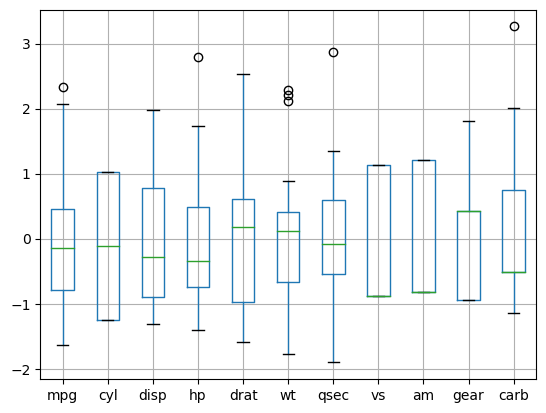

In [46]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler3.fit(cars.astype(float)) 
df_cars=pd.DataFrame(scaler3.transform(cars.astype(float))) 
df_cars.columns=cars.columns
df_cars.boxplot()

In [47]:
from sklearn.decomposition import PCA
pca3 = PCA()
pca3.fit(df_cars)

PCA()

<AxesSubplot: >

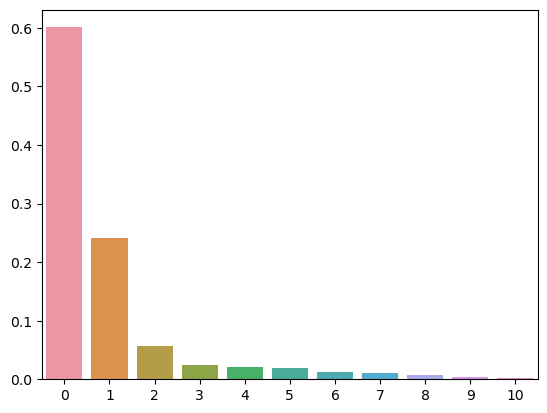

In [48]:
explained = pd.DataFrame(pca3.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [49]:
pd.DataFrame(pca3.components_,columns=cars.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.362531,-0.373916,-0.368185,-0.330057,0.294151,-0.346103,0.200456,0.306511,0.234943,0.206916,-0.214018
1,0.016124,0.043744,-0.049324,0.248784,0.274694,-0.143038,-0.463375,-0.231647,0.429418,0.462349,0.413571
2,-0.225744,-0.175311,-0.061484,0.140015,0.161189,0.341819,0.403169,0.428815,-0.205767,0.289780,0.528545
3,-0.022540,-0.002592,0.256608,-0.067676,0.854829,0.245899,0.068077,-0.214849,-0.030463,-0.264691,-0.126789
4,0.102845,0.058484,0.393995,0.540047,0.077327,-0.075029,-0.164666,0.599540,0.089781,0.048330,-0.361319
5,-0.108797,0.168554,-0.336165,0.071436,0.244497,-0.464940,-0.330480,0.194017,-0.570817,-0.243563,0.183522
6,0.367724,0.057278,0.214303,-0.001496,0.021120,-0.020668,0.050011,-0.265781,-0.587305,0.605098,-0.174603
7,0.754091,0.230825,-0.001142,0.222358,-0.032194,0.008572,0.231840,-0.025935,0.059747,-0.336150,0.395629
8,-0.235702,-0.054035,-0.198428,0.575830,0.046901,-0.359498,0.528377,-0.358583,0.047404,0.001735,-0.170641
9,0.139285,-0.846419,0.049380,0.247824,-0.101494,0.094394,-0.270673,-0.159039,-0.177785,-0.213825,0.072260


## pd.DataFrame(pca3.components_,columns=cars.columns)

In [50]:
cars_pca = pd.DataFrame(pca3.transform(df_cars),columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10','pc11']
                        ,index=cars.index.values)
cars_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
Mazda RX4,0.657213,1.735446,-0.601199,0.115522,-0.960653,-0.017259,-0.433311,0.009785,-0.148766,-0.067771,-0.182569
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307,-1.032949,-0.245592,-0.422860,0.085873,-0.075721,-0.128959,-0.090063
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139,0.405143,-0.354348,-0.618584,-0.594620,0.133328,0.046470,0.096147
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862,0.557997,0.019606,-0.041007,0.050376,-0.223742,-0.061366,-0.149973
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653,0.210836,0.151580,0.389645,0.162863,0.021515,-0.060787,-0.148750


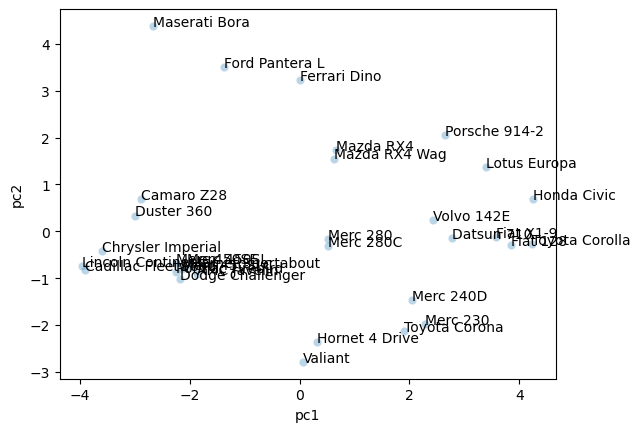

In [51]:
p2=sns.scatterplot(x="pc1", y="pc2",
              alpha=.3,
              data=cars_pca);
# add annotations one by one with a loop
for line in range(0,cars_pca.shape[0]):
     p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')


## Iris database

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()


In [53]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
#create the dataframe
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

<AxesSubplot: >

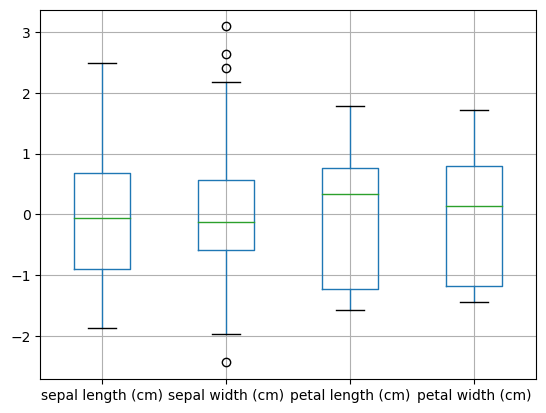

In [55]:
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler(copy=False) #or alternatively use MinMaxScaler
iris_scaler.fit(iris_df) # 
iris_scaler.transform(iris_df)
iris_df.boxplot()

In [56]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris_df)

PCA()

In [57]:
#VISUALIZE The percentage of variance explained by each of the selected components.
pd.DataFrame(pca.explained_variance_ratio_).transpose()


,0,1,2,3
0,0.729624,0.228508,0.036689,0.005179


<AxesSubplot: >

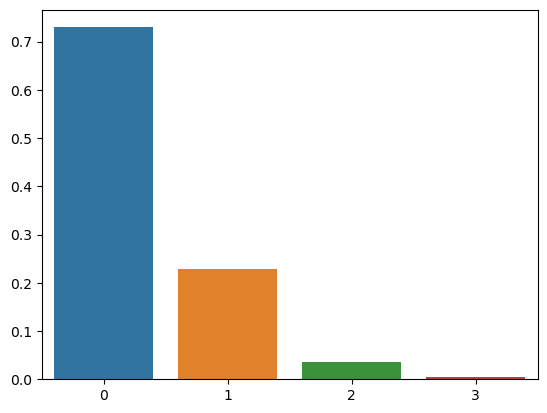

In [58]:
explained = pd.DataFrame(pca.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [59]:
pd.DataFrame(pca.components_,columns=iris_df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [60]:
# Let see the coordinates of the data in the PCA 
iris_pca = pd.DataFrame(pca.transform(iris_df),columns = ['pc1', 'pc2','pc3','pc4']
                        ,index=iris_df.index.values)
iris_pca 


,pc1,pc2,pc3,pc4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


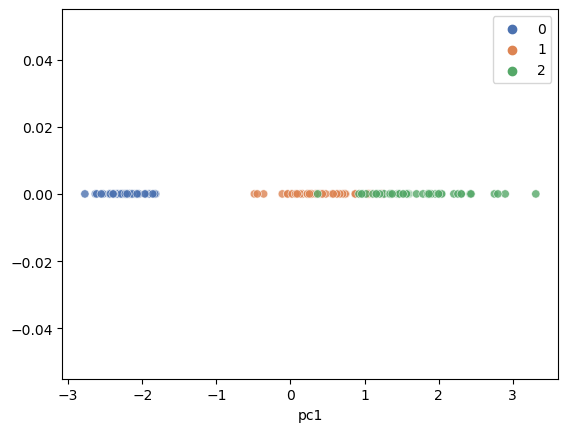

In [61]:
# The data in the first PCA 
sns.scatterplot(x="pc1", y=0,
              hue=iris['target'], alpha=.8,
              data=iris_pca,
               palette="deep");

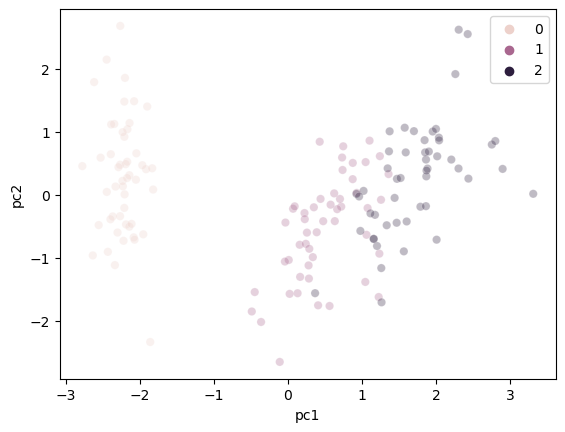

In [62]:
# The data in the first two PCA 
sns.scatterplot(x="pc1", y="pc2",
              hue=iris['target'], alpha=.3,
              data=iris_pca);